# Online-Learning-Quiz-Score-Distribution-Analysis

## Importing libraries and configuring work

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# code to save the figures as high-res PNGs

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# setting the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Loading data

In [4]:
data = pd.read_csv("Exam_Score_Prediction.csv")

dataset = [kaggle dataset](https://www.kaggle.com/datasets/kundanbedmutha/exam-score-prediction-dataset/data)

In [5]:
data.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [6]:
data.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [7]:
data.shape

(20000, 13)

## Insights about the data and processing

In [8]:
data.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [10]:
data.isnull().sum()

,0
student_id,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,0
study_method,0


In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data = data.drop(["student_id"], axis= 1)

In [13]:
data.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [14]:
numeric_cols = ['age', 'study_hours',
       'class_attendance', 'sleep_hours',  'exam_score']
non_numeric_cols = ['sleep_quality', 'gender','course','internet_access',
       'study_method', 'facility_rating', 'exam_difficulty',]

In [15]:
data[numeric_cols].head()

,age,study_hours,class_attendance,sleep_hours,exam_score
0,17,2.78,92.9,7.4,58.9
1,23,3.37,64.8,4.6,54.8
2,22,7.88,76.8,8.5,90.3
3,20,0.67,48.4,5.8,29.7
4,20,0.89,71.6,9.8,43.7


In [16]:
data[non_numeric_cols].head()

,sleep_quality,gender,course,internet_access,study_method,facility_rating,exam_difficulty
0,poor,male,diploma,yes,coaching,low,hard
1,average,other,bca,yes,online videos,medium,moderate
2,poor,male,b.sc,yes,coaching,high,moderate
3,average,other,diploma,yes,online videos,low,moderate
4,poor,female,diploma,yes,coaching,low,moderate


In [17]:
data["gender"].value_counts()

,count
gender,
other,6726
male,6695
female,6579


In [18]:
data["sleep_quality"].value_counts()

,count
sleep_quality,
average,6694
poor,6687
good,6619


In [19]:
data["exam_difficulty"].value_counts()

,count
exam_difficulty,
moderate,9878
easy,6141
hard,3981


In [20]:
cols_to_keep = ['age', 'gender', 'course', 'study_hours',
           'class_attendance','study_method', 'exam_score']

In [21]:
data_1 = data[cols_to_keep].copy()

In [22]:
data_1.head()

,age,gender,course,study_hours,class_attendance,study_method,exam_score
0,17,male,diploma,2.78,92.9,coaching,58.9
1,23,other,bca,3.37,64.8,online videos,54.8
2,22,male,b.sc,7.88,76.8,coaching,90.3
3,20,other,diploma,0.67,48.4,online videos,29.7
4,20,female,diploma,0.89,71.6,coaching,43.7


In [23]:
data_1.shape

(20000, 7)

In [24]:
data_1["course"].value_counts()

,count
course,
bca,2902
ba,2896
b.sc,2878
b.com,2864
bba,2836
diploma,2826
b.tech,2798


In [25]:
data_1["study_method"].value_counts()

,count
study_method,
self-study,4079
online videos,4069
coaching,4036
group study,3922
mixed,3894


In [26]:
data_1["gender"] = data_1["gender"].map({"male" : 0,
                                        "female" : 1,
                                        "other": 2})

In [30]:
data_1["course"].unique()

array(['diploma', 'bca', 'b.sc', 'b.tech', 'bba', 'ba', 'b.com'],
      dtype=object)

In [31]:
data_1["course"] = data_1["course"].map({'diploma':0, 'bca':1, 'b.sc':2, 'b.tech':3, 'bba':4, 'ba':5, 'b.com':6})

In [35]:
data_1['study_method'].unique()

array(['coaching', 'online videos', 'mixed', 'self-study', 'group study'],
      dtype=object)

In [36]:
data_1["study_method"] = data_1["study_method"].map({'coaching':0, 'online videos':1, 'mixed':2, 'self-study':3, 'group study':4})

In [38]:
data_1.head()

,age,gender,course,study_hours,class_attendance,study_method,exam_score
0,17,0,0,2.78,92.9,0,58.9
1,23,2,1,3.37,64.8,1,54.8
2,22,0,2,7.88,76.8,0,90.3
3,20,2,0,0.67,48.4,1,29.7
4,20,1,0,0.89,71.6,0,43.7


In [39]:
corr_data = data_1.corr(numeric_only=True)

In [40]:
corr_data

,age,gender,course,study_hours,class_attendance,study_method,exam_score
age,1.000000,0.001345,-0.009584,0.002955,0.008449,-0.003542,0.006522
gender,0.001345,1.000000,-0.012232,-0.003061,0.004831,0.001655,0.003539
course,-0.009584,-0.012232,1.000000,-0.006857,0.006376,0.002008,-0.002378
study_hours,0.002955,-0.003061,-0.006857,1.000000,-0.001645,-0.009197,0.717788
class_attendance,0.008449,0.004831,0.006376,-0.001645,1.000000,0.001079,0.308850
study_method,-0.003542,0.001655,0.002008,-0.009197,0.001079,1.000000,-0.124725
exam_score,0.006522,0.003539,-0.002378,0.717788,0.308850,-0.124725,1.000000


## Score Distribution and Difficulty Analysis

In [41]:
data_1['exam_score'].describe()

,exam_score
count,20000.000000
mean,62.513225
std,18.908491
min,19.599000
25%,48.800000
50%,62.600000
75%,76.300000
max,100.000000


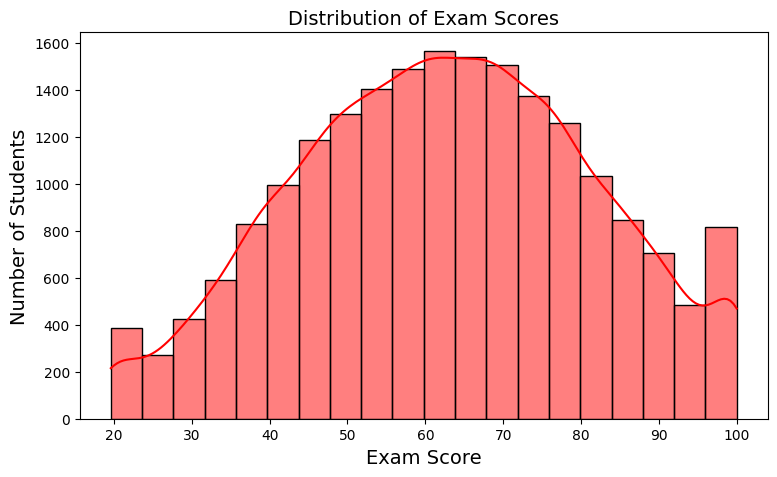

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(data_1['exam_score'], bins= 20, color="red", kde= True)
plt.xlabel("Exam Score")
plt.ylabel("Number of Students")
plt.title("Distribution of Exam Scores")
save_fig("exam_score_distribution")
plt.show()

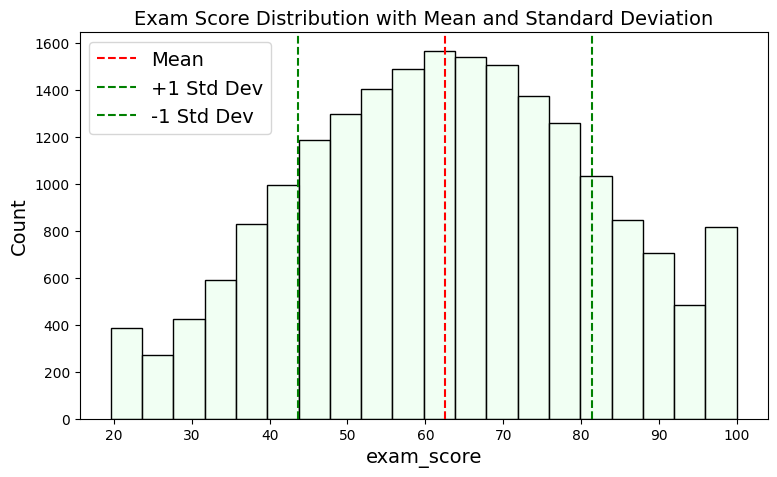

In [46]:
mean_score = data_1["exam_score"].mean()
std_score = data_1["exam_score"].std()
plt.figure(figsize=(8, 5))
sns.histplot(data_1["exam_score"], bins=20, color="#EDFFF0")
plt.axvline(mean_score, color="red", linestyle="--", label="Mean")
plt.axvline(mean_score + std_score, color="green", linestyle="--", label="+1 Std Dev")
plt.axvline(mean_score - std_score, color="green", linestyle="--", label="-1 Std Dev")
plt.legend()
plt.title("Exam Score Distribution with Mean and Standard Deviation")
save_fig("exam_score_mean_std")
plt.show()

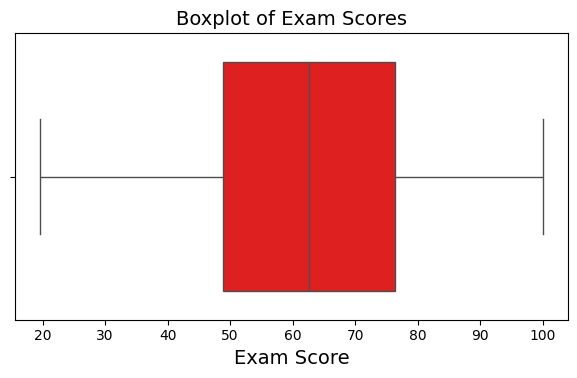

In [48]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data_1["exam_score"], color="red")
plt.xlabel("Exam Score")
plt.title("Boxplot of Exam Scores")
save_fig("exam_score_boxplot")
plt.show()

## extra analysis

In [55]:
gender_counts = data_1["gender"].value_counts()

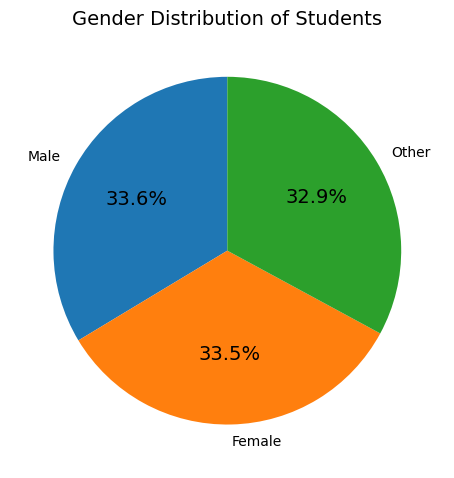

In [56]:
plt.figure(figsize=(5, 5))
plt.pie(gender_counts,labels=["Male", "Female","Other"],autopct="%1.1f%%",startangle=90)
plt.title("Gender Distribution of Students")
save_fig("gender_distribution_pie")
plt.show()

In [58]:
gender_mean_scores = data_1.groupby("gender")["exam_score"].mean()

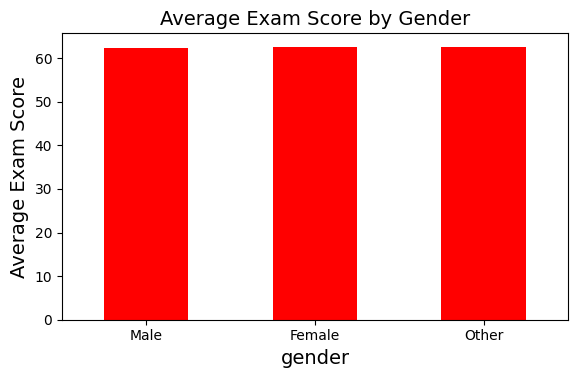

In [60]:
plt.figure(figsize=(6, 4))
gender_mean_scores.plot(kind="bar", color="red")
plt.xticks([0, 1, 2], [ "Male","Female","Other"], rotation=0)
plt.ylabel("Average Exam Score")
plt.title("Average Exam Score by Gender")
save_fig("exam_score_by_gender")
plt.show()

In [61]:
study_method_count = data_1["study_method"].value_counts().sort_index()

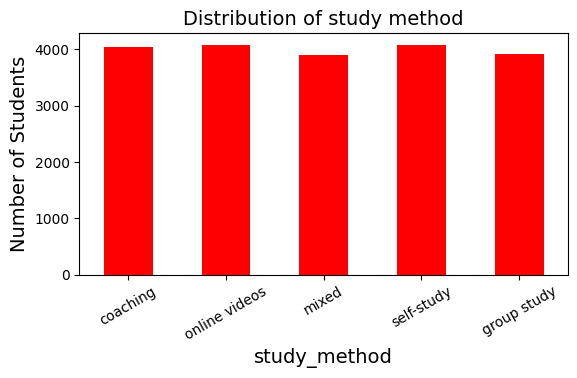

In [63]:
plt.figure(figsize=(6, 4))
study_method_count.plot(kind="bar", color = "red")
plt.xticks(ticks=[0, 1, 2, 3,4],labels=['coaching', 'online videos', 'mixed', 'self-study', 'group study'],rotation=30)
plt.ylabel("Number of Students")
plt.title("Distribution of study method")
save_fig("study_method")
plt.show()

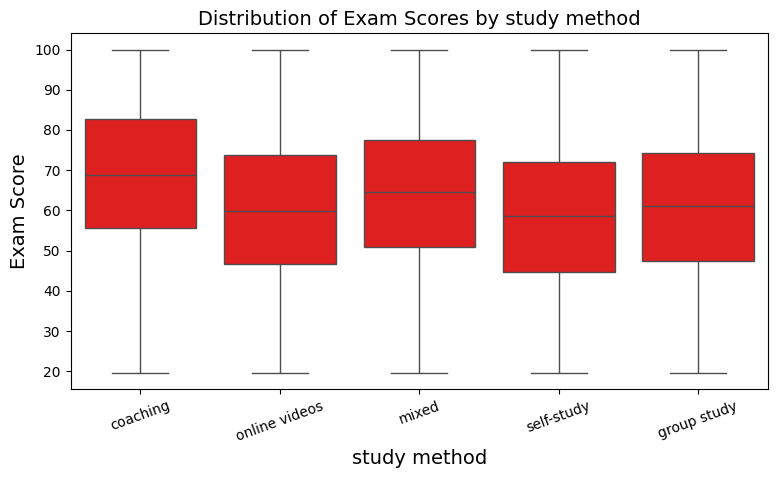

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data_1['study_method'], y=data_1["exam_score"], color="red")
plt.xticks(ticks=[0, 1, 2, 3, 4],labels=['coaching', 'online videos', 'mixed', 'self-study', 'group study'],rotation=20)
plt.xlabel("study method")
plt.ylabel("Exam Score")
plt.title("Distribution of Exam Scores by study method")
save_fig("exam_score_by_study_method_boxplot")
plt.show()